### **Create virtual environment** -> <u>run only if this is the first time you start the tool<u>

In [ ]:
!python src/setup_venv.py

⚙️ Creazione del virtual environment in .venv...
📦 Installazione pacchetti da requirements.txt...
  Using cached pip-25.3-py3-none-any.whl.metadata (4.7 kB)
Using cached pip-25.3-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 24.0
    Uninstalling pip-24.0:
      Successfully uninstalled pip-24.0
  Using cached dataframe_image-0.2.7-py3-none-any.whl.metadata (9.3 kB)
  Using cached docx-0.2.4-py3-none-any.whl
  Using cached fpdf-1.7.2-py2.py3-none-any.whl
  Using cached geopy-2.4.1-py3-none-any.whl.metadata (6.8 kB)
  Using cached holidays-0.89-py3-none-any.whl.metadata (50 kB)
  Using cached ipykernel-7.1.0-py3-none-any.whl.metadata (4.5 kB)
  Using cached matplotlib-3.10.8-cp311-cp311-win_amd64.whl.metadata (52 kB)
  Using cached nbformat-5.10.4-py3-none-any.whl.metadata (3.6 kB)
  Using cached numpy-2.4.1-cp311-cp311-win_amd64.whl.metadata (6.6 kB)
  Using cached numpy_financial-1.0.0-py3-none-any.whl.metadata (2.2 kB)
  Using cached openp

---

### **Check virtual environment**

In [1]:
from src.Functions_General import check_venv_kernel
check_venv_kernel(venv_name='.venv')

c:\Users\rollo\OneDrive - RSE S.P.A\Desktop\CACER simulator - public repo\CACER-simulator\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


✅ Il kernel è correttamente attivo nella venv '.venv' → c:\Users\rollo\OneDrive - RSE S.P.A\Desktop\CACER simulator - public repo\CACER-simulator\.venv\Scripts\python.exe


---

### **Import all functions and libraries**

In [2]:
from src.Functions_General import *
from src.Functions_Energy_Model import *
from src.Functions_Financial_Model import *
from src.Functions_Load_Emulator_and_DSM import *

---

## **External inputs to set before to run the simulation**

Before to run the simulation be sure to have set correctly the following input files:
        
- config.yml [[link yaml](config.yml)]

- users CACER.xlsx [[link excel](users%20CACER.xlsx)]

---

## **Initializing CACER configuration**

In this part, all the input files needed for the simulation are created.

### **1. Generating the calendar file**

A csv file is created with the following data:
- **datetime**, in format [%Y/%M/%D %h:%m:%s];

- **day week**, [1 : monday, 2 : thuesday, etc.];
- **holiday**, [True : holiday, False : not holiday];
- **fascia**, [1, 2, 3];
- **day_flag**, [monday, thuesday, etc.].

The csv file has the following structure:

| datetime  (type DatetimeIndex)| day_week (type int)| holiday (type boolean)| fascia (type int)| day_flag (type string)|      
| :----:| :----:| :----:| :----:| :----:|
| 01/01/2025  00:00:00| 2| True| 3| Sunday| 
| 01/01/2025  00:15:00| 2| True| 3| Sunday| 
| ...| ...| ...| ...| ...| 

📂  *files/general/calendar.csv*

In [3]:
generate_calendar()


Create calendar: 

start date:  2026-01-01
number of years:  20
delta time:  15Min

**** Calendar successfully exported! ****



---

### **2. Generating the yaml and csv files with all the inputs of the CACER configuration**

The following files are created:
- generate_users_yml() 

        → files/recap.yml 

        → files/registry_user_types.yml 

        → files/registry_users.yml

        → files/registry_users.csv

- generate_plant_yml() 

        → files/registry_plant.yml

        → files/registry_plant.csv

- membership_matrix() 

        → files/membership_matrix.csv

- plant_operation_matrix() 

        → files/plant_operation_matrix.xlsx


In [4]:
initialization_users()


Generate parameters in yaml file from xlsx file: 


Generating registry_user_types.yml and registry_user.yml:

Total users:  18
15  CACER members types created
List of users in active configuration:
4  prosumers
0  producers
14  consumers

PV capacity installed [kW]:  [3, 3, 3, 20]
Battery capacity installed [kWh]:  [0, 0, 0, 0]

**** Registry users completed! ****

Generating plant yml:

**** Registry plants completed! ****

Generating Membership Matrix:

 **** Membership Matrix created! ****

Generating plant operation matrix:

**** Plant Operation Matrix created! ****


---

### **3. Generating the emulated load profile of the users**

A csv file is created with the following data:
- **datetime**, in format [%Y/%M/%D %h:%m:%s];

- quarterly electrical load of each individual user [kWh/15min].

The csv file has the following structure:

| datetime  (type DatetimeIndex)| user_1 (type float)| user_2 (type float)| ...|      
| :----:| :----:| :----: | :----: |
| 01/01/2025  00:00:00| 0.109| 0.109| ...| 
| 01/01/2025  00:15:00| 0.098| 0.098| ...| 
| ...| ...| ...| ...| 

**emultated users only*

📂 *files/input/emulated_load_profile.csv*

In [6]:
flag_last_dict = False # if false we create the appliance start time dictionary; if true we import the last one created (default: False)
flag_optDSM = False # if true we simulate the optimized DSM case (default: False)
flag_all_appliance = True # if true we use all appliance for the load profile emulation (default: True)
flag_daily_activation = True # if false we dont'use a daily usage activation for some specified appliances (only washing machine at the moment, default: True)
flag_multi_use = True # if true we activate the possibility to have multiple activations for the selected appliances during the day (default: True)

create_emulated_users(flag_last_dict, flag_optDSM, flag_all_appliance, flag_daily_activation, flag_multi_use)


Create load profile for emulated users: 

**** No emulated users found! ****


---

### **4. Generating all load profile of the users (domestic users, commercial users, industrial users, etc.)**

A csv file is created with the following data:
- **datetime**, in format [%Y/%M/%D %h:%m:%s];

- quarterly electrical load of each individual user [kWh/15min].

The csv file has the following structure (**carichi.csv**):

| datetime  (type DatetimeIndex)| user_1 (type float)| user_2 (type float)| ...|      
| :----:| :----:| :----: | :----: |
| 01/01/2025  00:00:00| 0.109| 0.109| ...| 
| 01/01/2025  00:15:00| 0.098| 0.098| ...| 
| ...| ...| ...| ...| 

**all users*

📂 *files/energy/carichi.csv*

In [7]:
load_profile_all_users()


Generate load profile for user types added: 

Random factor: 5 %
15 user types consuming found
user created:  household_medium 		 user type:  arera
user created:  household_small_1 		 user type:  arera
user created:  household_small_2 		 user type:  arera
user created:  household_small_3 		 user type:  arera
user created:  household_small_4 		 user type:  arera
user created:  household_small_5 		 user type:  arera
user created:  household_small_6 		 user type:  arera
user created:  household_small_7 		 user type:  arera
user created:  household_small_8 		 user type:  arera
user created:  household_small_prosumer 		 user type:  arera
user created:  municipal_office 		 user type:  ufficio_comunale
user created:  public_cinema 		 user type:  cinema_comunale
user created:  public_gym 		 user type:  palestra_comunale
user created:  public_library 		 user type:  biblioteca_comunale
user created:  public_school 		 user type:  liceo

**** Load profiles successfully exported! ****


---

### **5. Generating productivity of the photovoltaic generators**

A csv file is created with the following data:
- **datetime**, in format [%Y/%M/%D %h:%m:%s];

- quarterly electrical productivity of each individual user [kWh/15min].

The csv file has the following structure:

| datetime  (type DatetimeIndex)| user_1 (type float)| user_2 (type float)| ...|      
| :----:| :----:| :----: | :----: |
| 01/01/2025  00:00:00| 0.109| 0.109| ...| 
| 01/01/2025  00:15:00| 0.098| 0.098| ...| 
| ...| ...| ...| ...| 

**all users*

📂 *files/output_gen_pv.csv*

In [8]:
simulate_configuration_productivity()


Generate production profile for user types added:

0. Simulation of the productivity for each generators 

9. Derating of the yearly production

	completed!

10. Formatting the dataset in an unstacked structure
     household_small_prosumer completed!
     public_school completed!

	Check leap day completed!

	completed!

11.2. Export csv 

     completed!


---

### **6. Generating all energy flows of the single users**

A csv file is created <u>for each users</u> with the following data:
- **datetime**, in format [%Y/%M/%D %h:%m:%s];

- **Eprel**, quarterly withdrawn energy [kWh/15min];
- **Eut**, quarterly consumed energy [kWh/15min];
- **Eimm**, quarterly injected energy [kWh/15min];
- **Eprod**, quarterly produced energy [kWh/15min];
- **Eperdite**, quarterly lost energy [kWh/15min];
- **Eaut**, quarterly self-consumed energy [kWh/15min];
- **Eaut_PV**, quarterly self-consumed energy from photovoltaic generator [kWh/15min];
- **Eaut_batt**, quarterly self-consumed energy from battery [kWh/15min].

The csv files have the following structure:

| datetime  (type DatetimeIndex)| Eprel (type float)| Eut (type float)| Eimm (type float)| Eprod (type float)| Eperdite (type float)| Eaut (type float)| Eaut_PV (type float)| Eaut (type float)|      
|:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|
| 01/01/2025  00:00:00| 0.0899| 0.0899| 0.0899| 0.0899| 0.0899| 0.0899| 0.0899| 0.0899|  
| 01/01/2025  00:15:00| 0.0909| 0.0909| 0.0909| 0.0909| 0.0909| 0.0909| 0.0909| 0.0909| 
| ...| ...| ...| ...| ...| ...| ...| ...| ...| 

📂 *files/energy/profili_utenti/*

In [9]:
CACER_energy_flows()


Generate all CACER energy flows: 

15 user types found

All files in files\\energy\\profili_utenti\\ folder deleted


 - users without storage: 100%|██████████| 15/15 [00:47<00:00,  3.18s/it]


**** All CACER energy flows created! ****


---
---

## **Simulate CACER configuration**

In this part, all economic cash flows (aggregated for the project, aggregated for the CACER configuratione and for each user types) are simulated. 

Finally, a Discounted Cash Flow (DCF) is calculated for each "actor" (project, CACER configuration, users).

Before to run the simulation be sure to have set correctly the following input files:
        
- input_FM.xlsx [[link excel](files/input_FM.xlsx)]

---

### **7. Calculate the electricity bills for each user types**

Before to run the simulation be sure to have set correctly the following input files:

        → files/mercato.yml

A csv file is created <u>for each actor</u> with the following data:
- **month**, in format [%Y-%M];

- **me_cost**, monthly cost for energy [€/month];
- **transport_cost**, monthly cost for transport [€/month];
- **ogs_cost**, monthly general system costs [€/month];
- **energy_cost**, monthly cost variable with electricity consumption [€/month];
- **fixed_cost**, monthly fixed cost [€/month];
- **power_cost**, monthly cost variable with contractual power [€/month];
- **duty_cost**, monthly cost for duty [€/month];
- **vat_cost**, monthly cost for vat [€/month];
- **total_bill_cost**, monthly total bill cost [€/month];
- **load_active**, monthly consumed energy [kWh/month];
- **load_active_corrected**, monthly consumed energy corrected with losses [kWh/month].

The csv files have the following structure:

| month  (type DatetimeIndex)| me_cost (type float)| transport_cost (type float)| ogs_cost (type float)| energy_cost (type float)| fixed_cost (type float)| power_cost (type float)| duty_cost (type float)| vat_cost (type float)| total_bill_cost (type float)| load_active (type float)| load_active_corrected (type float)|      
|:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|
| 2025-01| 71.56| 71.56| 71.56| 71.56| 71.56| 71.56| 71.56| 71.56| 71.56| 71.56| 71.56|
| 2025-02| 58.89| 58.89| 58.89| 58.89| 58.89| 58.89| 58.89| 58.89| 58.89| 58.89| 58.89|
| ...| ...| ...| ...| ...| ...| ...| ...| ...| ...| ...| ...| 

📂 *files/finance/bills/*

&nbsp;

🚨 **PAY ATTENTION:**

- For consumers there are two sheets: one with the monthly values in BAU scenario (Business As Usual) and another one with the quarterly values.

- For prosumers and producers there are four sheets: monthly BAU scenario (without the photovoltaic generator), quarterly BAU scenario, monthly PV scenario (with the photovoltaic generator) and quarterly PV scenario.

- For project and for configuration (the xlsx file name is the same as the primary cabin name indicated in the *user CACER.xlsx* file) there are two sheets: monthly BAU scenario (without the photovoltaic generator) and monthly PV scenario (with the photovoltaic generator).

In [10]:
create_users_bill()


Create user bills: 

All files in files\\finance\\bills\\ folder deleted
Calculating electricity bills for all users

User type: household_medium
Tariff scheme: index + spread
Electricity withdrawn bau in year 1:	 3,338.8 kWh
Electricity expenses bau in year 1:	 1,476.58 €
	--> Average cost bau in year 1: 		 0.442 €/kWh

User type: household_small_1
Tariff scheme: flat_11
Electricity withdrawn bau in year 1:	 3,338.6 kWh
Electricity expenses bau in year 1:	 1,231.60 €
	--> Average cost bau in year 1: 		 0.369 €/kWh

User type: household_small_2
Tariff scheme: flat_11
Electricity withdrawn bau in year 1:	 3,338.4 kWh
Electricity expenses bau in year 1:	 1,231.56 €
	--> Average cost bau in year 1: 		 0.369 €/kWh

User type: household_small_3
Tariff scheme: flat_11
Electricity withdrawn bau in year 1:	 3,338.8 kWh
Electricity expenses bau in year 1:	 1,231.66 €
	--> Average cost bau in year 1: 		 0.369 €/kWh

User type: household_small_4
Tariff scheme: flat_11
Electricity withdrawn bau i

---

### **8. Setting name and type of the configuration and editing of the incentive repartition**

The "*case_denomination*" and the "*type_of_cacer*" are added to recap.yml file.

The "*case_denomination*" is used for the final report with results, for the folder with results, etc.

The "*type_of_cacer*" is necessary for the calculation of the incentives.

Finally, the incentive repartition between the members of the CACER configuration (internal and external) is setted in the following file:

        → files/inputs_FM.xlsx

&nbsp;

🚨 **PAY ATTENTION:**

The file *input_FM.xlsx* contains all the inputs for financila simulation.

It is possible to set the following repartition for the incentives:

* Egualitario
* Prosumer
* PNRR
* Equitario
* Misto CER
* Misto AUC
* Misto - ESCo
* Social Fund
* Misto - Social Fund
* Misto - Social Fund 2
* Misto - Social Fund PA
* Misto - PA
* CACER
        

In [13]:
case_denomination = "CER_test" 
CACER_type = "CER" # CER; AUD; AID; NO_CACER
repartition_scheme = "Egualitario" # Egualitario; Prosumer; PNRR; Equitario; Misto CER; Misto AUC; Misto - ESCo; Social Fund; Misto - Social Fund; Misto - Social Fund 2; Misto - Social Fund PA; Misto - PA; CACER

setting_CACER_scenario(case_denomination, CACER_type, repartition_scheme)


Setting input financial simulation: 

**** All inputs set! ****


---

### **9. Calculate CACER energy shared**

📘 **Formula**

The energy shared in the CACER configuration is calculated with the following formula:


$$ Hourly ~ energy ~ shared  = \min \left( \sum_{n_g=1}^{N_{gens}} ~ E_{inj, ~h, ~n_g}  ; \sum_{n_c=1}^{N_{consumers}} ~  E_{draw, ~h, ~n_c} \right) $$


🔍 **Meaning of the Terms**

- $
N_{gens}:~ \text{Number of energy generators (e.g., photovoltaic systems);}
$

- $
N_{consumers}:~ \text{Number of consumers in the community;}
$

- $
h:~ \text{Hour of the month;}
$

- $
E_{inj,h}:~ \text{Energy injected into the grid by a generator at hour } h;
$

- $
E_{draw,h}:~ \text{Energy drawn from the grid by a consumer at hour } h.
$



💾 **Outputs**

- In the csv file (*shared_energy_incentive_hourly.csv*) are collected the hourly values for the entire configuration and for each plants.

  The csv file has the following structure:

| dayhour  (type DatetimeIndex)| Eimm_CACER (type float)| Econd_config_ *Primary Station name* (type float)| Econd_ *user name* (type float)| ...| Econd_cond_CACER (type float)|
|:----:|:----:|:----:|:----:|:----:|:----:|
| 2025-01-01 00| 0| 0| 0| ...| 0|
| 2025-01-01 01| 0| 0| 0| ...| 0|
| ...| ...| ...| ...| ...| ...| 

📂 *files/energy/shared_energy_incentive_hourly.csv*

&nbsp;

- In the csv file (*shared_energy_incentive_yearly.csv*) are collected the yearly aggregated values for the entire configuration. 

  The csv file has the following structure:

| year  (type DatetimeIndex)| Eimm (type float)| Econd (type float)| perc_cond_annuale type float|
|:----:|:----:|:----:|:----:|
| 2025| 24512.54| 2133.47| 0.087|
| 2026| 24228.59| 2119.51| 0.087|
| ...| ...| ...| ...|

📂 *files/energy/shared_energy_incentive_hourly.csv*

&nbsp;

- In the csv file (*shared_energy_valorization_hourly.csv*) are collected the hourly values for the entire configuration and for each generators. The energy shared used for the calculation of the valorization can be different respect that calculated for the incentives (in this case also the "old" plants partecipate).

  The csv file has the following structure:

| dayhour  (type DatetimeIndex)| Econd_VAL (type float)| Econd_bt_VAL (type float)| Econd_mt_VAL (type float)| Econd_CP_VAL (type float)| Econd_CP_bt_VAL (type float)| Econd_CP_mt_VAL (type float)|
|:----:|:----:|:----:|:----:|:----:|:----:|:----:| 
| 2025-01-01 00| 0| 0| 0| 0| 0| 0|
| 2025-01-01 01| 0| 0| 0| 0| 0|  0|
| ...| ...| ...| ...| ...| ...| ...|

📂 *files/energy/shared_energy_valorization_hourly.csv*

In [14]:
CACER_shared_energy()


Calculate CACER shared energy:

Calculating shared energy for TIP:

- Configuration: CP1
User types:  15
Consuming users:  [('household_medium', 2), ('household_small_1', 1), ('household_small_2', 1), ('household_small_3', 1), ('household_small_4', 1), ('household_small_5', 1), ('household_small_6', 1), ('household_small_7', 1), ('household_small_8', 1), ('household_small_prosumer', 3), ('municipal_office', 1), ('public_cinema', 1), ('public_gym', 1), ('public_library', 1), ('public_school', 1)]
The total shared energy of the configuration is generated hierarchically by the following plants:
	Plant p_D009, type household_small_prosumer share:	 14.8 %
	Plant p_D00A, type household_small_prosumer share:	 14.8 %
	Plant p_D00B, type household_small_prosumer share:	 14.7 %
	Plant p_P00I, type public_school share:	 55.7 %
Configuration CP1 for TIP:             
	21 MWh/y shared,             
	110 MWh/y withdrawal,             
	26 MWh/y injected.

**** Shared energy for TIP exported ****

C

---

### **10. Calculate energy sold revenues**

📘 **Formula**

The energy sold revenues of the generators are calculated with the following formula:


$$ Monthly ~ energy ~ sold ~ revenues = \sum_{n_g=1}^{N_{gens}} ~ \sum_{h=1}^{H_{month}} E_{inj, ~h, ~n_g} × PZO_h $$


🔍 **Meaning of the Terms**

- $
N_{gens}:~ \text{Number of energy generators (e.g., photovoltaic systems);}
$

- $
h:~ \text{Hour of the month;}
$

- $
H_{month}:~ \text{Total hours of the month;}
$

- $
E_{inj,h}:~ \text{Energy injected into the grid by a generator at hour } h;
$

- $
PZO_h:~ \text{Energy cost for the market zone at hour } h.
$



📝 **Inputs**

The inputs for the RID calculation are listed in:

        → files/RID/RID_input.yml

&nbsp;

💾 **Outputs**

- The first csv file (*output_RID.csv*) has the following structure:

| month  (type int)| *plant_id_1* (type float)| *plant_id_2* (type float)| ...|
|:----:|:----:|:----:|:----:|
| 2025-01| 107.32| 107.32| ...|
| 2025-02| 146.81| 146.81| ...| 
| ...| ...| ...| ...| 

📂 *files/RID/output_RID.csv*

&nbsp;

- In the csv file (*output_GSE_RID_fees.csv*) are collected the monthly fees cost for the RID accounting for each generators of the configuration.
  
  The csv file has the following structure:

| month  (type int)| *plants_id_1* (type float)| *plant_id_2* (type float)| ...|
|:----:|:----:|:----:|:----:|
| GSE_fees| 14| 14| ...|

📂 *files/RID/output_GSE_RID_fees.csv*

In [15]:
RID_calculation()


Calculate RID:

Yearly costs for the management of the different generators [€/year]: 	 {'household_small_prosumer': 2.0999999999999996, 'public_school': 14.0}
Calculation RID fees for CACER users completed!

Export GSE_RID_fees to csv completed!

Check PMG concessions: 
 {'household_small_prosumer': True, 'public_school': True}
Checking PMG concessions for all users completed!

Calculation PZO values for each hour for all the years of the project completed!

Calculation PZO values for each hour for all the years of the project completed!

Calculation of the monthly energy sold for all users completed!

Export PZO_data to csv completed!

Export RID_data to csv completed!


---

### **11. Aggregate bills costs and energy sold revenues for the entire CACER configuration**


All the bills costs and energy sold revenues are aggregated for the entire configuration. In particular:

- The function **aggregate_CACER_bills()** create a csv file (*CACER_incentivi_per_configuration.csv*) with the following structure:

| month  (type DatetimeIndex)| incentivo (type float)| valorizzazione (type float)| incentivo_totale (type float)| surplus (type float)| social_fund (type float)|
|:----:|:----:|:----:|:----:|:----:|:----:|
| 2025-01| 17.61| 1.43| 17.61| 0| 0|
| 2025-02| 18.90| 1.53| 18.90| 0| 0|
| ...| ...| ...| ...| ...| ...| 

📂 *files/incentivi/CACER_incentivi_per_configuration.csv*

&nbsp;

- The function **aggregate_CACER_RID()** create a csv file (*output_RID_active_CACER.csv*) with the following structure:

| month  (type int)| *plant_id_1* (type float)| *plant_id_2* (type float)| ...| CER (type float)|
|:----:|:----:|:----:|:----:|:----:|
| 2025-01| 107.32| 107.32| ...| 1065.31|
| 2025-02| 146.81| 146.81| ...| 1854.54|
| ...| ...| ...| ...| ...| 

📂 *files/RID/output_RID_active_CACER.csv*

In [16]:
aggregate_CACER_bills()


Aggregate bills for the entire CACER:



Aggregating bills - CP1: 100%|██████████| 15/15 [00:04<00:00,  3.09it/s]


**** CACER bills aggregated! ****


In [17]:
aggregate_CACER_RID()


Aggregate RID for the entire CACER:



Aggregate RID CACER: 100%|██████████| 2/2 [00:00<?, ?it/s]


**** Aggregated RID CACER (energy sold revenues) created! ****


---

### **12. Generating the xlsx and csv files with all the financial inputs of the CACER configuration**

The following files are created:

        → files/finance/FM_template.csv

        → files/finance/investment_matrix.csv

        → files/finance/ownership_matrix.xlsx

        → files/finance/repartition_matrix.xlsx

        → files/finance/subscription_matrix.csv

        → files/finance/subscription_matrix.xlsx

        → files/finance/user_entry_matrix.csv

In [18]:
FM_initialization()


Initialize financial simulation: 

Creating FM template:

yearly inflation rate yr1: 1.5 %

user category: domestico
yearly discount rate: 3.75 %

user category: commerciale
yearly discount rate: 5.0 %

user category: pubblico
yearly discount rate: 3.75 %

user category: industriale
yearly discount rate: 8.0 %

user category: ESCo
yearly discount rate: 8.0 %

user category: CACER
yearly discount rate: 3.75 %
**** FM template created! ****

Creating Investment Matrix:

       p_D009 p_D00A p_D00B p_P00I
u_D009  100.0                     
u_D00A         100.0              
u_D00B                100.0       
u_P00I                       100.0
u_d001                            
u_d002                            
u_d003                            
u_d004                            
u_d005                            
u_d006                            
u_d007                            
u_d008                            
u_d00C                            
u_d00D                            
u

---

### **13. Calculate incentives revenues**

📘 **Formula incentives**

The incentives revenues of the configuration are calculated with the following formula:


$$ Monthly ~ incentives ~ revenues = \sum_{h=1}^{H_{month}} E_{shared, ~FIP, ~h} × FIP_h $$


🔍 **Meaning of the Terms**

- $
h:~ \text{Hour of the month;}
$

- $
H_{month}:~ \text{Total hours of the month;}
$

- $
E_{shared,FIP,h}:~ \text{Energy shared into the CACER configuration at hour } h;
$

- $
FIP_h:~ \text{Feed In Premium at hour } h.
$

&nbsp;

📘 **Formula valorization**

The valorization revenues of the configuration are calculated with the following formula:

$$ Monthly ~ valorization ~ revenues = CU_{Afa, m} × E_{ACV} + CU_{Afb), m} × E_{ACVC} + \sum_{i} (E_{ACV, ~i} × CP_{PR, ~i} × Pz) $$

🔍 **Meaning of the Terms**

- $
CU_{Afa, m}:~ \text{flat-rate monthly self-consumption unit fee }(TRAS_{E});
$

- $
E_{ACV}:~ \text{Monthly self-consumed energy;}
$

- $
CU_{Afb), m}:~ \text{flat-rate monthly self-consumption unit fee (BTAU)};
$

- $
E_{ACVC}:~ \text{Monthly self-consumed energy for voltage level i}
$

- $
E_{ACV, ~i}:~ \text{Hourly self-consumed energy for voltage level i}
$

- $
CP_{PR, ~i}:~ \text{coefficient of avoided losses (1.2\% for medium voltage and 2.6\% for low voltage)}
$

- $
Pz:~ \text{Hourly market price}
$

&nbsp;

💾 **Outputs**

The csv file (*CACER_incentivi.csv*) has the following structure:

| month_number  (type int)| incentivo (type float)| valorizzazione (type float)| incentivo_totale (type float)| surplus (type float)| social_fund (type float)|
|:----:|:----:|:----:|:----:|:----:|:----:|
| 1| 17.61| 1.43| 17.61| 0| 0|
| 2| 18.90| 1.53| 18.90| 0| 0|
| ...| ...| ...| ...| ...| ...| 

📂 *files/incentivi/CACER_incentivi.csv*

In [19]:
incentives()


Calculate incentives: 

Factor FC_zonale: €/MWh  10

Plant: p_D009
Size factor - TP_base: €/MWh  80
Size factor - CAP: €/MWh  120
F_pnrr = 0.0
Average TIP: €/MWh  130.0

Plant: p_D00A
Size factor - TP_base: €/MWh  80
Size factor - CAP: €/MWh  120
F_pnrr = 0.0
Average TIP: €/MWh  130.0

Plant: p_D00B
Size factor - TP_base: €/MWh  80
Size factor - CAP: €/MWh  120
F_pnrr = 0.0
Average TIP: €/MWh  130.0

Plant: p_P00I
Size factor - TP_base: €/MWh  80
Size factor - CAP: €/MWh  120
F_pnrr = 0.0
Average TIP: €/MWh  130.0

The max_grant_pnrr found is:  0
The surplus threshold is:  0.55
The incentive surplus threshold exceeded in 20 years

**** Incentives calculation completed! ****


---

### **14. All the economic cash flows for each users and for each stakeholders are calculated**

The function **cash_flows_for_all_plants()** calculate all the economic invoicse for the generators of the configuration.

A csv file (*plants_id.xlsx*) for each generators are created with the following sheets:

- Capex;

- D&A;

- Debt;

- Opex;

- Revenues;

- Totals.

📂 *files/finance/plants/*

&nbsp;

The function **cash_flows_for_all_users()** calculate all the economic cash flows for the users of the configuration, for the social fund and for the entire CACER configuration.

- A csv file (*user_id.xlsx*) for each generators are created with the following sheets:

    - plant_id;

    - CACER;

    - DCF_monthly;

    - DCF_yearly;

    - Results.

- A csv file (*social_fund.xlsx*) for each generators are created with the following economic cash flows:

    - month [%Y/%M];

    - inflaction_factor;
    
    - revenues_social_fund

- A csv file (*CACER.xlsx*) for each generators are created with the following sheets:

    - CACER;

    - totals;

    - DCF_monthly;

    - DCF_yearly;

    - Results.

📂 *files/finance/users/*

In [20]:
cash_flows_for_all_plants() # plants first...


Calculate cash flows for all power plants: 

CHECK: item= pv,	 size = 3,	 scale factor found: 1.35,	 capex €: 4455.00
CHECK: item= pv_inverter,	 size = 2.4000000000000004,	 scale factor found: 1.20,	 capex €: 161.28
CHECK: item= mv_cabinet,	 size = 1,	 scale factor found: 0.00,	 capex €: 0.00
CHECK: item= pv,	 size = 3,	 scale factor found: 1.35,	 capex €: 4455.00
CHECK: item= pv_inverter,	 size = 2.4000000000000004,	 scale factor found: 1.20,	 capex €: 161.28
CHECK: item= mv_cabinet,	 size = 1,	 scale factor found: 0.00,	 capex €: 0.00
CHECK: item= pv,	 size = 3,	 scale factor found: 1.35,	 capex €: 4455.00
CHECK: item= pv_inverter,	 size = 2.4000000000000004,	 scale factor found: 1.20,	 capex €: 161.28
CHECK: item= mv_cabinet,	 size = 1,	 scale factor found: 0.00,	 capex €: 0.00
CHECK: item= pv,	 size = 20,	 scale factor found: 1.25,	 capex €: 27500.00
CHECK: item= pv_inverter,	 size = 16.0,	 scale factor found: 1.15,	 capex €: 1030.40
CHECK: item= mv_cabinet,	 size = 1,	 scale fact

In [22]:
cash_flows_for_all_users() # ...then users...


Calculate cash flows for all users: 

All files in files\\finance\\users\\ folder deleted

User u_D009 owning:
- plant p_D009 with 100.0% share
IRR: 9.34 %
Net Present Value: 1,736.95 €
User u_D009 calculation successful


User u_D00A owning:
- plant p_D00A with 100.0% share
IRR: 9.34 %
Net Present Value: 1,736.95 €
User u_D00A calculation successful


User u_D00B owning:
- plant p_D00B with 100.0% share
IRR: 9.34 %
Net Present Value: 1,736.95 €
User u_D00B calculation successful


User u_P00I owning:
- plant p_P00I with 100.0% share
IRR: 17.25 %
Net Present Value: 28,014.85 €
User u_P00I calculation successful

IRR: nan %
Net Present Value: 1,340.79 €
User u_d001 calculation successful

IRR: nan %
Net Present Value: 1,340.79 €
User u_d002 calculation successful

IRR: nan %
Net Present Value: 1,340.79 €
User u_d003 calculation successful

IRR: nan %
Net Present Value: 1,340.79 €
User u_d004 calculation successful

IRR: nan %
Net Present Value: 1,340.79 €
User u_d005 calculation succes

---

### **15. All the economic cash flows are aggregated for the project and for the CACER configuration (<u>for single primary station</u>)**

A csv file (*project.xlsx*) is created with the following sheets:

- plants;

- CACER;

- totals;

- DCF_monthly;

- DCF_yearly;

- Results.

&nbsp;

A csv file (*primary_station_id.xlsx*) for each primary stations are created with the following sheets:

- plants;

- CACER;

- totals;

- DCF_monthly;

- DCF_yearly;

- Results.

📂 *files/finance/configurations/*

In [23]:
aggregate_FM() # ...then configurations!


Run financial model for each configurations: 

All files in files\\finance\\configurations\\ folder deleted

Configuration:  CP1
IRR: 20.42 %
Net Present Value: 52,223.46 €
Payback time: 6.1 yrs

Stakeholder:  PA
IRR: 19.77 %
Net Present Value: 33,604.71 €
Payback time: 6.3 yrs

Configuration:  project
IRR: 20.42 %
Net Present Value: 52,223.46 €
Payback time: 6.1 yrs

**** FM for configurations aggregated! ****


---

### **16.1 The simulation results are organized for the export and for the creation of the report**

Different results are added to *files/recap.yml* and the following file is created:

        → files/results_finance/results_FM_last_simulation.csv

In [24]:
organize_simulation_results_for_reporting()


Organize results for report: 

**** All results organized! *****


---

### **16.2 Creating the report with results**

A report with the main results is created.

✅ Il kernel è correttamente attivo nella venv '.venv' → c:\Users\rollo\OneDrive - RSE S.P.A\Desktop\CACER simulator - public repo\CACER-simulator\.venv\Scripts\python.exe

Create report: 

All files in assets\\energy\\ folder deleted
All files in assets\\finance\\ folder deleted
All files in assets\\general\\ folder deleted
All files in assets\\bills\\ folder deleted
All files in assets\\gen_pv\\ folder deleted


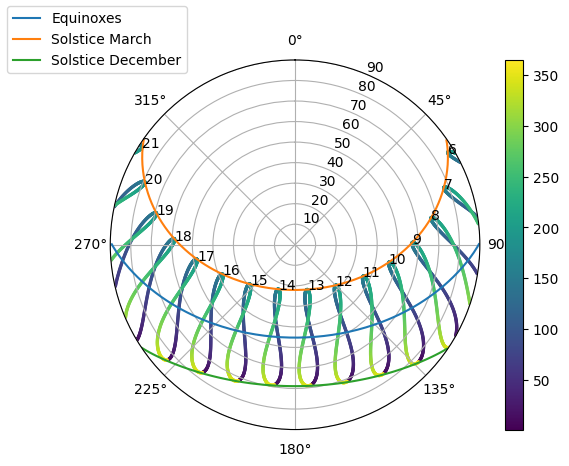

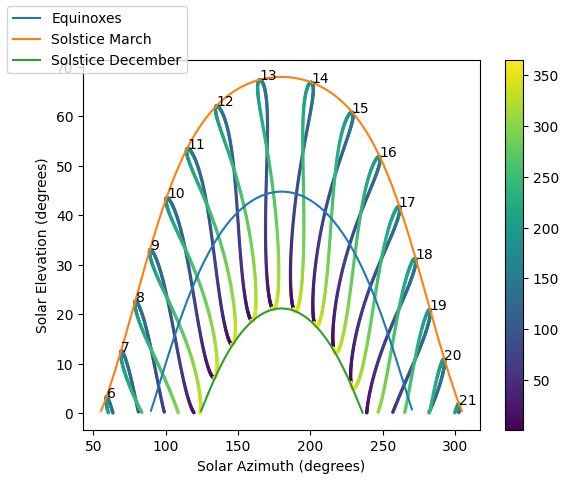


**** Report exported! ****


In [25]:
%run Reporting.ipynb

---

### **16.3 Saving the report and results**

All the following files and results are collected in a folder.

        → all files stored in files/finance/
        → files/energy/CACER_energy_monthly.xlsx
        → files/incentivi/CACER_incentivi.csv
        → files/membership_matrix.csv
        → files/plant_operation_matrix.xlsx
        → files/inputs_FM.xlsx
        → files/registry_plants.yml
        → files/registry_user_types.yml
        → files/registry_users.yml
        → files/results_finance/results_FM_last_simulation.csv
        → files/recap.yml
        → the report stored in files/results_finance/case_denomination_id.docx

📂 *files/results_finance/case_denomination/*

In [26]:
save_simulation_results(simulation_name = case_denomination)


Save all finance results: 


**** All finance results saved! ****


---

### **17. Killing all excel processes in background**

In [27]:
kill_excel_processes()


Killing all excel process in backgroud: 


**** All excel processes killed! ****


---
---